In [2]:
from pathlib import Path
from typing import List, Dict, Tuple, Callable

import pandas as pd
import numpy as np


from tools import get_daily_input

YEAR = 2022


In [3]:
!pip install -q advent-of-code-data

You should consider upgrading via the 'C:\AnsysDev\Python39\python.exe -m pip install --upgrade pip' command.


# 01 December 2022


In [2]:
%get_daily_input 1 2022

In [2]:
def get_calories(path: Path) -> List[int]:
    """Retrieve calories carried by each elf"""
    content = Path(path).read_text(encoding="utf-8")
    return [
        sum(int(line) for line in block.strip().split("\n"))
        for block in content.split("\n\n")
    ]


calories = pd.Series(get_calories(input_path), name="calories")
calories


NameError: name 'List' is not defined

In [111]:
# Get the top calories
calories.max()


69693

In [12]:
# Get the sum of calories from top 3
calories.sort_values(ascending=False).head(3).sum()


200945

## With list instead of pandas


In [10]:
def get_calories(path: Path) -> List[int]:
    """Retrieve calories carried by each elf"""
    content = Path(path).read_text(encoding="utf-8")
    return [
        sum(int(line) for line in block.strip().splitlines())
        for block in content.split("\n\n")
    ]


calories = get_calories(input_path)
max(calories), sum(sorted(calories, reverse=True)[:3])


(69693, 200945)

# 02 December 2022


In [160]:
%get_daily_input 2
data[:100]

'A Z\nA Y\nB X\nB X\nC X\nB X\nA X\nA X\nC X\nA X\nA X\nA Y\nB X\nA Y\nC X\nC X\nA X\nA Y\nC X\nB X\nA X\nB X\nA X\nA X\nB Y\n'

In [176]:
import enum


class Gesture(enum.IntEnum):
    ROCK = 0
    PAPER = 1
    SCISSORS = 2


GESTURES = list(Gesture)


In [177]:
from typing import Literal

ABC = Literal["A", "B", "C"]
XYZ = Literal["X", "Y", "Z"]


def get_points(other_letter: ABC, my_letter: XYZ) -> int:
    """Get the points for a given combination of letters"""
    # We will use the values of the enum
    other = GESTURES["ABC".index(other_letter)]
    me = GESTURES["XYZ".index(my_letter)]

    points_choice = me.value + 1
    if other == me:
        return 3 + points_choice

    if me.value == (other.value + 1) % 3:
        return 6 + points_choice

    return points_choice


get_points("A", "Y"), get_points("B", "X"), get_points("C", "Z")


(8, 1, 6)

In [178]:
mini_data = """
A Y
B X
C Z
"""


In [179]:
import re


def get_points_from_list(data: str, fn=get_points) -> int:
    """Get the points from the data"""
    return sum(fn(other, my) for other, my in re.findall(r"([ABC]) ([XYZ])", data))


(get_points_from_list(mini_data), get_points_from_list(data))


(15, 11150)

In [181]:
def get_points_2(other_letter: ABC, my_letter: XYZ) -> int:
    """Get the points for a given combination of letters (2nd scenario)"""
    other = GESTURES["ABC".index(other_letter)]

    # X means you loose, Y means you draw, Z means you win
    offset = "XYZ".index(my_letter) - 1
    me = GESTURES[(other.value + offset) % 3]

    points_choice = me.value + 1
    if other == me:
        return 3 + points_choice

    if me.value == (other.value + 1) % 3:
        return 6 + points_choice

    return points_choice


assert get_points_from_list(mini_data, fn=get_points_2) == 6 + 3 + 3
get_points_from_list(data, fn=get_points_2)


8295

# Day 3


In [139]:
%get_daily_input 3
data[:100]

'BdbzzddChsWrRFbzBrszbhWMLNJHLLLLHZtSLglFNZHLJH\nnnfMwqpQTMffHlNNLllHnZSS\ncGpcMwfppfqcjcTCBBzWDsDbDrjz'

In [142]:
MINI_DATA = """\
vJrwpWtwJgWrhcsFMMfFFhFp
jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL
PmmdzqPrVvPwwTWBwg
wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn
ttgJtRGJQctTZtZT
CrZsJsPPZsGzwwsLwLmpwMDw
"""


In [150]:
from string import ascii_lowercase, ascii_uppercase


def get_line_priority(line: str) -> int:
    """Get the priority of each rucksack line"""
    half_length = len(line) // 2
    left, right = line[:half_length], line[half_length:]
    common_letter = set(left).intersection(set(right)).pop()
    # Find the priority of the common letter
    letters = ascii_lowercase + ascii_uppercase
    return letters.index(common_letter) + 1


get_line_priority("vJrwpWtwJgWrhcsFMMfFFhFp"), get_line_priority(
    "jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL"
)


(16, 38)

In [151]:
sum(get_line_priority(line) for line in data.splitlines())


7889

In [148]:
from typing import Generator


def get_badge_priority(txt: str) -> Generator[int, None, None]:
    """Get the priorities of the badges, by group of 3"""
    lines = txt.splitlines()
    for i in range(0, len(lines), 3):
        common_letters = (
            set(lines[i])
            .intersection(set(lines[i + 1]))
            .intersection(set(lines[i + 2]))
        )
        letters = ascii_lowercase + ascii_uppercase
        yield min(letters.index(letter) + 1 for letter in common_letters)


sum(get_badge_priority(MINI_DATA))


70

In [149]:
sum(get_badge_priority(data))


2825

# Day 4


In [128]:
%get_daily_input 4
data[:100]

'91-93,6-92\n85-97,18-63\n15-99,16-98\n35-49,34-50\n4-7,6-93\n57-86,57-58\n1-82,83-90\n21-88,20-89\n83-84,1-8'

In [129]:
MINI_DATA = """\
2-4,6-8
2-3,4-5
5-7,7-9
2-8,3-7
6-6,4-6
2-6,4-8"""


In [131]:
def is_fully_contained(line: str) -> bool:
    """Check if the line is fully contained in another line"""
    left, right = line.split(",")
    left_min, left_max = [int(e) for e in left.split("-")]
    right_min, right_max = [int(e) for e in right.split("-")]
    return (left_min <= right_min and left_max >= right_max) or (
        right_min <= left_min and right_max >= left_max
    )


is_fully_contained("6-6,4-6"), is_fully_contained("2-6,4-8")


(True, False)

In [132]:
sum(is_fully_contained(line) for line in MINI_DATA.splitlines())


2

In [133]:
sum(is_fully_contained(line) for line in data.splitlines())


456

In [135]:
def is_overlap(line: str) -> bool:
    """Check if the line contains overlap"""
    left, right = line.split(",")
    left_min, left_max = [int(e) for e in left.split("-")]
    right_min, right_max = [int(e) for e in right.split("-")]
    left_range = set(range(left_min, left_max + 1))
    right_range = set(range(right_min, right_max + 1))
    return bool(left_range.intersection(right_range))


is_overlap("6-6,4-6"), is_overlap("2-6,4-8"), is_overlap("4-8,2-6"), is_overlap(
    "2-4,6-8"
)


(True, True, True, False)

In [136]:
sum(is_overlap(line) for line in data.splitlines())


808

# Day 5


In [213]:
%get_daily_input 5

In [183]:
CRATES = """\
            [M] [S] [S]
        [M] [N] [L] [T] [Q]
[G]     [P] [C] [F] [G] [T]
[B]     [J] [D] [P] [V] [F] [F]
[D]     [D] [G] [C] [Z] [H] [B] [G]
[C] [G] [Q] [L] [N] [D] [M] [D] [Q]
[P] [V] [S] [S] [B] [B] [Z] [M] [C]
[R] [H] [N] [P] [J] [Q] [B] [C] [F]
"""


In [224]:
MINI_DATA = """\
    [D]
[N] [C]
[Z] [M] [P]
 1   2   3

move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2
"""


In [186]:
import re

line = CRATES.splitlines()[0]

line


'            [M] [S] [S]'

In [219]:
from collections import defaultdict
from typing import Dict, List

# List of crates from the top
def get_crates(data: str) -> Dict[int, List[str]]:
    """Get list of crates as dictionary"""
    all_crates = defaultdict(list)
    for line in data.splitlines():
        crates = (
            c.strip("[ ]")
            for c in re.findall(r"(\[[A-Z]\]| {3})(?: |$)", line, flags=re.M)
        )
        for i, crate in enumerate(crates, start=1):
            if crate:
                all_crates[i].append(crate)
    return all_crates


all_crates = get_crates(data)
all_crates


defaultdict(list,
            {4: ['M', 'N', 'C', 'D', 'G', 'L', 'S', 'P'],
             5: ['S', 'L', 'F', 'P', 'C', 'N', 'B', 'J'],
             6: ['S', 'T', 'G', 'V', 'Z', 'D', 'B', 'Q'],
             3: ['M', 'P', 'J', 'D', 'Q', 'S', 'N'],
             7: ['Q', 'T', 'F', 'H', 'M', 'Z', 'B'],
             1: ['G', 'B', 'D', 'C', 'P', 'R'],
             8: ['F', 'B', 'D', 'M', 'C'],
             9: ['G', 'Q', 'C', 'F'],
             2: ['G', 'V', 'H']})

In [199]:
commands = 
commands

[('1', '2', '1'), ('3', '1', '3'), ('2', '2', '1'), ('1', '1', '2')]

In [222]:
values = [1, 2, 3, 4, 5]
# Get first 3 values with pop
values.insert(0, 10)
values


[10, 1, 2, 3, 4, 5]

In [230]:
def part_1(pb_input: str):
    all_crates = get_crates(pb_input)

    commands = re.findall(r"move (\d+) from (\d) to (\d)", pb_input)
    for qty, from_pile, to_pile in commands:
        from_pile = int(from_pile)
        to_pile = int(to_pile)
        for _ in range(int(qty)):
            crate = all_crates[from_pile].pop(0)
            all_crates[to_pile].insert(0, crate)

    solution = "".join(c[0] for nb, c in sorted(all_crates.items()))
    print(f"Solution: {solution}")
    return all_crates


part_1(MINI_DATA)


Solution: CMZ


defaultdict(list, {2: ['M'], 1: ['C'], 3: ['Z', 'N', 'D', 'P']})

In [231]:
part_1(data)


Solution: TLNGFGMFN


defaultdict(list,
            {4: ['G',
              'L',
              'Q',
              'H',
              'H',
              'V',
              'M',
              'C',
              'F',
              'D',
              'S',
              'J',
              'J',
              'Q',
              'G',
              'D',
              'S'],
             5: ['F', 'S'],
             6: ['G'],
             3: ['N'],
             7: ['M'],
             1: ['T',
              'C',
              'N',
              'Z',
              'B',
              'B',
              'B',
              'D',
              'G',
              'T',
              'D',
              'C',
              'M',
              'M',
              'R',
              'P',
              'P',
              'B',
              'Z',
              'Q',
              'V',
              'G',
              'C',
              'B',
              'P',
              'Q',
              'F',
              'D',
              'C',
    

In [232]:
def part_2(pb_input: str):
    all_crates = get_crates(pb_input)

    commands = re.findall(r"move (\d+) from (\d) to (\d)", pb_input)
    for qty, from_pile, to_pile in commands:
        qty = int(qty)
        from_pile = int(from_pile)
        to_pile = int(to_pile)

        all_crates[to_pile] = all_crates[from_pile][:qty] + all_crates[to_pile]
        all_crates[from_pile] = all_crates[from_pile][qty:]

    solution = "".join(c[0] for nb, c in sorted(all_crates.items()))
    print(f"Solution: {solution}")
    return all_crates


part_2(MINI_DATA)


Solution: MCD


defaultdict(list, {2: ['C'], 1: ['M'], 3: ['D', 'N', 'Z', 'P']})

In [233]:
part_2(data)


Solution: FGLQJCMBD


defaultdict(list,
            {4: ['Q',
              'T',
              'Q',
              'C',
              'P',
              'B',
              'D',
              'N',
              'T',
              'M',
              'C',
              'V',
              'V',
              'Z',
              'F',
              'H',
              'G'],
             5: ['J', 'B'],
             6: ['C'],
             3: ['L'],
             7: ['M'],
             1: ['F',
              'S',
              'S',
              'G',
              'N',
              'D',
              'M',
              'S',
              'Q',
              'P',
              'H',
              'N',
              'M',
              'C',
              'G',
              'F',
              'B',
              'P',
              'D',
              'G',
              'R',
              'D',
              'Q',
              'S',
              'Z',
              'C',
              'J',
              'F',
              'P',
    

# Day 6


In [238]:
%get_daily_input 6 2022

In [247]:
def get_index_end_marker(signal: str, size: int = 4) -> int:
    """Get the index of the end marker after <size> different characters"""
    for i in range(len(signal) - size):
        if len(set(signal[i : i + size])) == size:
            return i + size
    return 0


mini_data = """\
bvwbjplbgvbhsrlpgdmjqwftvncz
nppdvjthqldpwncqszvftbrmjlhg
nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg
zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw
"""

for line in mini_data.splitlines():
    print(get_index_end_marker(line))

get_index_end_marker(data)


5
6
10
11


1892

In [246]:
get_index_end_marker(data, size=14)


2313

# Day 7


In [4]:
%get_daily_input 7 2022



In [5]:
MINI_DATA = """\
$ cd /
$ ls
dir a
14848514 b.txt
8504156 c.dat
dir d
$ cd a
$ ls
dir e
29116 f
2557 g
62596 h.lst
$ cd e
$ ls
584 i
$ cd ..
$ cd ..
$ cd d
$ ls
4060174 j
8033020 d.log
5626152 d.ext
7214296 k
"""


In [14]:
from collections import defaultdict
from typing import Dict
from pathlib import Path


def get_size_dirs(data: str) -> Dict[str, int]:
    """Get size of directories"""
    size_dirs = defaultdict(int)
    current_dir = Path("/")
    for line in data.splitlines():
        if line.startswith("$ cd .."):
            current_dir = current_dir.parent
        elif line.startswith("$ cd "):
            current_dir = current_dir / line[5:]
        elif line.startswith("$ ls"):
            continue
        elif line.startswith("dir "):
            # dir_name = line[4:]
            # size_dirs[current_dir] += size_dirs[dir_name]
            continue
        else:
            size, _ = line.split()
            size_dirs[current_dir] += int(size)
            for p in current_dir.parents:
                size_dirs[p] += int(size)
    return size_dirs


size_mini_data = get_size_dirs(MINI_DATA)
size_mini_data


defaultdict(int,
            {WindowsPath('/'): 48381165,
             WindowsPath('/a'): 94853,
             WindowsPath('/a/e'): 584,
             WindowsPath('/d'): 24933642})

In [16]:
sum(v for d, v in size_mini_data.items() if v < 100000)


95437

In [17]:
sum(v for v in get_size_dirs(data).values() if v < 100000)


1642503

In [18]:
# submit(1642503, day=7)


answer a: None
submitting for part a


That's the right answer!  You are one gold star closer to collecting enough star fruit. You achieved rank 66 on this star's leaderboard and gained 35 points! [Continue to Part Two]


<Response [200]>

In [39]:
TOTAL_SIZE = 70000000
NEEDED_SPACE = 30000000
[
    min(
        v
        for v in size_mini_data.values()
        if TOTAL_SIZE - size_mini_data[Path("/")] + v > NEEDED_SPACE
    ),
    min(
        v for v in size_mini_data.values() if v > TOTAL_SIZE - size_mini_data[Path("/")]
    ),
]


[24933642, 24933642]

In [21]:
size_data = get_size_dirs(data)
size_data


defaultdict(int,
            {WindowsPath('/'): 46592386,
             WindowsPath('/fts'): 618943,
             WindowsPath('/fts/dlqtffw'): 73533,
             WindowsPath('/fts/rbfmmjvd'): 290697,
             WindowsPath('/jnwr'): 851171,
             WindowsPath('/jnwr/wbv'): 461954,
             WindowsPath('/jnwr/wbv/nmdwbnnr'): 208370,
             WindowsPath('/jnwr/zzbvdcf'): 8052,
             WindowsPath('/lrvl'): 22022022,
             WindowsPath('/lrvl/bqqltcg/dlbjblbf'): 11732,
             WindowsPath('/lrvl/bqqltcg'): 2980003,
             WindowsPath('/lrvl/bqqltcg/fdlw'): 414205,
             WindowsPath('/lrvl/bqqltcg/fdlw/hlvpfw/dhwq'): 185769,
             WindowsPath('/lrvl/bqqltcg/fdlw/hlvpfw'): 185769,
             WindowsPath('/lrvl/bqqltcg/jnwr'): 521337,
             WindowsPath('/lrvl/bqqltcg/slzdbm'): 161906,
             WindowsPath('/lrvl/bqqltcg/zcgrgff'): 1870823,
             WindowsPath('/lrvl/bqqltcg/zcgrgff/ztrslh'): 1584583,
             WindowsP

In [35]:
solution = min(
    v
    for v in size_data.values()
    if TOTAL_SIZE - size_data[Path("/")] + v > NEEDED_SPACE
)
print(f"Solution: {solution}")


Solution: 6999588


# Day 8


In [5]:
%get_daily_input 8

In [6]:
MINI_DATA = """\
30373
25512
65332
33549
35390
"""


In [90]:
# Check trees visible from outside based on height

import numpy as np
import numpy.typing as npt

IntMatrix = npt.NDArray[np.int64]
BoolMatrix = npt.NDArray[np.bool_]


def get_trees(data: str) -> IntMatrix:
    matrix = np.array([[int(nb) for nb in line] for line in data.splitlines()])
    return matrix


matrix = get_trees(MINI_DATA)
matrix


array([[3, 0, 3, 7, 3],
       [2, 5, 5, 1, 2],
       [6, 5, 3, 3, 2],
       [3, 3, 5, 4, 9],
       [3, 5, 3, 9, 0]])

In [26]:
def is_visible(matrix: IntMatrix) -> BoolMatrix:
    """Create a boolean matrix where True means the number is visible"""
    visible = np.zeros_like(matrix, dtype=bool)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (
                np.all(matrix[i, :j] < matrix[i, j])
                or np.all(matrix[i, j + 1 :] < matrix[i, j])
                or np.all(matrix[:i, j] < matrix[i, j])
                or np.all(matrix[i + 1 :, j] < matrix[i, j])
            ):
                visible[i, j] = True
    return visible


visible = is_visible(matrix)
visible


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [ True,  True, False,  True,  True],
       [ True, False,  True, False,  True],
       [ True,  True,  True,  True,  True]])

In [58]:
def compute_nb_visible(data: str) -> int:
    """Compute the number of visible trees"""
    matrix = get_trees(data)
    visible = is_visible(matrix)
    return np.sum(visible)


compute_nb_visible(MINI_DATA)


21

In [21]:
solution = compute_nb_visible(data)
print(f"Solution: {solution}")
# submit(solution, day=8)


1851

In [93]:
from typing import List

IntArray = npt.NDArray[np.int64]


def get_nb_trees_visible(height: int, other_trees: IntArray) -> int:
    """Compute the number of trees visible from the current tree"""
    # print(height, other_trees)
    nb_trees_visible = 0
    for other_height in other_trees:
        nb_trees_visible += 1
        if other_height >= height:
            break

    return nb_trees_visible


def get_viewing_distance(matrix: IntMatrix) -> IntMatrix:
    """Create an integer matrix where the value is the multiplication of all numbers visible from the current number"""
    score = np.zeros_like(matrix, dtype=int)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            height = matrix[i, j]
            # print(f"Position: {i, j}, height: {height}")
            score[i, j] = (
                get_nb_trees_visible(height, matrix[i, :j][::-1])
                * get_nb_trees_visible(height, matrix[i, j + 1 :])
                * get_nb_trees_visible(height, matrix[:i, j][::-1])
                * get_nb_trees_visible(height, matrix[i + 1 :, j])
            )
    return score


# get_nb_trees_visible(5, [3, 5, 3, 1])


def get_max_score(data: str) -> int:
    """Compute the maximum score for visibility"""
    matrix = get_trees(data)
    scores = get_viewing_distance(matrix)
    return scores.max()


get_max_score(MINI_DATA)


8

In [54]:
solution = get_max_score(data)
print(f"Solution: {solution}")
# submit(solution, day=8)


Solution: 574080


answer a: 1851
submitting for part b (part a is already completed)


That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 8! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

... just for fun, where will be the tree


In [119]:
from typing import Tuple

BoolArray = npt.NDArray[np.bool_]

# matrix = get_trees(MINI_DATA)
matrix = get_trees(data)
scores = get_viewing_distance(matrix)
max_score = scores.argmax()
position_tree_house = np.unravel_index(max_score, scores.shape)
print(position_tree_house)


def is_visible_from_tree_house(
    matrix: IntMatrix, position_tree_house: Tuple[int, int]
) -> BoolMatrix:
    """Create a boolean matrix where True means the number is visible"""
    visible = np.zeros_like(matrix, dtype=bool)
    height_house = matrix[position_tree_house]

    def is_row_visible(other_trees: IntArray, reversed: bool = False) -> BoolArray:
        """Check if the current tree is visible from the current row"""
        result = np.zeros_like(other_trees, dtype=bool)
        if reversed:
            other_trees = other_trees[::-1]
        for i, other_height in enumerate(other_trees):
            result[i] = True
            if other_height >= height_house:
                break

        return result if not reversed else result[::-1]

    pos_i, pos_j = position_tree_house
    visible[pos_i, :pos_j] = is_row_visible(matrix[pos_i, :pos_j], reversed=True)
    visible[pos_i, pos_j + 1 :] = is_row_visible(matrix[pos_i, pos_j + 1 :])
    visible[:pos_i, pos_j] = is_row_visible(matrix[:pos_i, pos_j], reversed=True)
    visible[pos_i + 1 :, pos_j] = is_row_visible(matrix[pos_i + 1 :, pos_j])

    return visible


# Transform the matrix to show the visible trees from the tree house
forest = matrix.copy()
trees_visible = is_visible_from_tree_house(matrix, position_tree_house)
forest[~trees_visible] = -1
forest[position_tree_house] = matrix[position_tree_house]

# As all numbers are 1 digit (0-9), we can just crumb them together without alignment
# (otherwise, we would have to use a format on 2-3 spaces)
# We can also add a space between them if it feels too crowded: `" ".join(str(v) ...)`
print("\n".join("".join(str(v) if v != -1 else "." for v in line) for line in forest))


(78, 52)
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...........................................................................................

# Day 9


In [4]:
%get_daily_input 9

In [5]:
MINI_DATA = """
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2
"""


In [33]:
import re

from typing import List, Set, Tuple

Pos = Tuple[int, int]


def get_new_pos_head(current_pos: Pos, direction: str, distance: int = 1) -> Pos:
    """Compute the new position of the head"""
    if direction == "R":
        return (current_pos[0], current_pos[1] + distance)
    if direction == "L":
        return (current_pos[0], current_pos[1] - distance)
    if direction == "U":
        return (current_pos[0] + distance, current_pos[1])
    if direction == "D":
        return (current_pos[0] - distance, current_pos[1])

    raise ValueError(f"Unknown direction: {direction}")


def get_new_pos_tail(pos: Pos, h: Pos) -> Pos:
    """Move towards head if distance of 2 in one direction,
    or 1 in diagonal if both x and y different
    """
    if abs(pos[0] - h[0]) * abs(pos[1] - h[1]) >= 2:
        return (
            pos[0] + (1 if pos[0] < h[0] else -1),
            pos[1] + (1 if pos[1] < h[1] else -1),
        )
    if abs(pos[0] - h[0]) == 2:
        return (
            pos[0] + (1 if pos[0] < h[0] else -1),
            pos[1],
        )
    if abs(pos[1] - h[1]) == 2:
        return (
            pos[0],
            pos[1] + (1 if pos[1] < h[1] else -1),
        )
    return pos


def get_positions_visited(data: str, verbose: bool = True) -> Set[Pos]:
    positions_visited: Set[Pos] = {(0, 0)}
    current_pos_head: Pos = (0, 0)
    current_pos_tail: Pos = (0, 0)

    for direction, distance in re.findall(r"([LRUD]) (\d+)", data):
        distance = int(distance)
        if verbose:
            print(direction, distance)
        for _ in range(distance):
            current_pos_head = get_new_pos_head(current_pos_head, direction)
            current_pos_tail = get_new_pos_tail(current_pos_tail, current_pos_head)
            positions_visited.add(current_pos_tail)
            if verbose:
                print(f"New head position: {current_pos_head}")
                print(f"New tail position: {current_pos_tail}")
                print("----")

    return positions_visited


positions_visited = get_positions_visited(MINI_DATA)

print(f"Visited positions: {sorted(positions_visited)}")
print(f"Number of visited positions: {len(positions_visited)}")


R 4
New head position: (0, 1)
New tail position: (0, 0)
----
New head position: (0, 2)
New tail position: (0, 1)
----
New head position: (0, 3)
New tail position: (0, 2)
----
New head position: (0, 4)
New tail position: (0, 3)
----
U 4
New head position: (1, 4)
New tail position: (0, 3)
----
New head position: (2, 4)
New tail position: (1, 4)
----
New head position: (3, 4)
New tail position: (2, 4)
----
New head position: (4, 4)
New tail position: (3, 4)
----
L 3
New head position: (4, 3)
New tail position: (3, 4)
----
New head position: (4, 2)
New tail position: (4, 3)
----
New head position: (4, 1)
New tail position: (4, 2)
----
D 1
New head position: (3, 1)
New tail position: (4, 2)
----
R 4
New head position: (3, 2)
New tail position: (4, 2)
----
New head position: (3, 3)
New tail position: (4, 2)
----
New head position: (3, 4)
New tail position: (3, 3)
----
New head position: (3, 5)
New tail position: (3, 4)
----
D 1
New head position: (2, 5)
New tail position: (3, 4)
----
L 5
New

In [35]:
positions_visited = get_positions_visited(data, verbose=False)
solution = len(positions_visited)
print(f"Solution: {solution}")
# submit(solution, day=9)


Solution: 6337


answer a: None
submitting for part a


That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


<Response [200]>

In [37]:
MINI_DATA_2 = """
R 5
U 8
L 8
D 3
R 17
D 10
L 25
U 20
"""


In [44]:
def get_positions_visited_long(
    data: str, length: int = 9, verbose: bool = True
) -> Set[Pos]:
    positions_visited: Set[Pos] = {(0, 0)}
    rope_positions: List[Pos] = [(0, 0)] * (length + 1)

    for direction, distance in re.findall(r"([LRUD]) (\d+)", data):
        distance = int(distance)
        if verbose:
            print(direction, distance)
        for _ in range(distance):
            rope_positions[0] = get_new_pos_head(rope_positions[0], direction)
            for i in range(1, length + 1):
                rope_positions[i] = get_new_pos_tail(
                    rope_positions[i], rope_positions[i - 1]
                )
            positions_visited.add(rope_positions[-1])
            if verbose:
                print(f"New rope position: {rope_positions}")

    return positions_visited


# positions_visited = get_positions_visited_long(MINI_DATA)
# len(positions_visited)
positions_visited = get_positions_visited_long(MINI_DATA_2)
len(positions_visited)


R 5
New rope position: [(0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(0, 3), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
U 8
New rope position: [(1, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(2, 5), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(3, 5), (2, 5), (1, 4), (1, 3), (1, 2), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0)]
New rope position: [(4, 5), (3, 5), (2, 5), (2, 4), (2, 3), (2, 2), (1, 1), (0, 0), (0, 0), (0, 0)]
New rope position: [(5, 5), (4, 5), (3, 5), (2, 4), (2, 3), (2, 2), (1, 1), (0, 0), (0, 0), 

36

In [45]:
positions_visited = get_positions_visited_long(data, verbose=False)
solution = len(positions_visited)
print(f"Solution: {solution}")
# submit(solution, day=9, part=2)


Solution: 2455
That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 9! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

# Day 10


In [35]:
%get_daily_input 10 2022

In [36]:
MINI_DATA = """\
addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop
"""


In [38]:
# noop does nothing
# addx adds the number to the current value after 2 cycles
# We will use a queue to store the numbers to add

from collections import deque
from typing import List


def get_values(data: str, cycles: int = 20) -> List[int]:
    values: List[int] = []
    current_value = 1
    additions = deque()
    lines = iter(data.splitlines())
    line = next(lines, "")
    while line or additions:
        if line:
            additions.append(0)
        if line.startswith("addx"):
            additions.append(int(line.split()[1]))

        current_value += additions.popleft()
        values.append(current_value)
        line = next(lines, "")

    return values


get_values(MINI_DATA)


[1,
 16,
 16,
 5,
 5,
 11,
 11,
 8,
 8,
 13,
 13,
 12,
 12,
 4,
 4,
 17,
 17,
 21,
 21,
 21,
 20,
 20,
 25,
 25,
 24,
 24,
 29,
 29,
 28,
 28,
 33,
 33,
 32,
 32,
 37,
 37,
 36,
 36,
 1,
 1,
 2,
 2,
 26,
 26,
 7,
 7,
 8,
 8,
 24,
 24,
 13,
 13,
 13,
 13,
 34,
 34,
 19,
 19,
 19,
 19,
 16,
 16,
 25,
 25,
 26,
 26,
 23,
 23,
 31,
 31,
 32,
 32,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 1,
 1,
 1,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 25,
 25,
 26,
 26,
 26,
 13,
 13,
 26,
 26,
 33,
 33,
 33,
 34,
 34,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 11,
 11,
 11,
 10,
 10,
 12,
 12,
 13,
 13,
 13,
 30,
 30,
 21,
 21,
 22,
 22,
 23,
 23,
 20,
 20,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 20,
 20,
 1,
 1,
 2,
 2,
 5,
 5,
 31,
 31,
 1,
 1,
 13,
 13,
 12,
 12,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 7,
 7,
 25,
 25,
 26,
 26,
 28,
 28,
 28,
 28,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 38,
 38,
 1,
 1,
 2,
 2,
 5,
 5,
 5,
 20,
 20,
 -1,
 -1,
 2

In [39]:
values = get_values(MINI_DATA)
values_to_add = [20 + (40 * i) for i in range(6)]
print(values)
print([(i, values[i - 1]) for i in values_to_add])
solution = sum(i * values[i - 1] for i in values_to_add)
print(f"Solution: {solution}")


[1, 16, 16, 5, 5, 11, 11, 8, 8, 13, 13, 12, 12, 4, 4, 17, 17, 21, 21, 21, 20, 20, 25, 25, 24, 24, 29, 29, 28, 28, 33, 33, 32, 32, 37, 37, 36, 36, 1, 1, 2, 2, 26, 26, 7, 7, 8, 8, 24, 24, 13, 13, 13, 13, 34, 34, 19, 19, 19, 19, 16, 16, 25, 25, 26, 26, 23, 23, 31, 31, 32, 32, 37, 37, 37, 37, 37, 37, 37, 1, 1, 1, 2, 2, 9, 9, 9, 9, 9, 11, 11, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 25, 25, 26, 26, 26, 13, 13, 26, 26, 33, 33, 33, 34, 34, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 11, 11, 11, 10, 10, 12, 12, 13, 13, 13, 30, 30, 21, 21, 22, 22, 23, 23, 20, 20, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 20, 20, 1, 1, 2, 2, 5, 5, 31, 31, 1, 1, 13, 13, 12, 12, 15, 15, 16, 16, 16, 16, 16, 7, 7, 25, 25, 26, 26, 28, 28, 28, 28, 37, 37, 37, 37, 37, 36, 36, 38, 38, 1, 1, 2, 2, 5, 5, 5, 20, 20, -1, -1, 21, 21, 15, 15, 16, 16, 16, 18, 18, 19, 19, 19, 9, 9, 9, 9, 29, 29, 30, 30, 32, 32, 34, 34, 28, 28, 17, 17, 17, 17]
[(20, 21), (60, 19), (100, 18), (140, 21), (180, 16), (220, 19)]
Solution: 13360


In [40]:
values = get_values(data)
values_to_add = [20 + (40 * i) for i in range(6)]
print([(i, values[i - 1]) for i in values_to_add])
solution = sum(i * values[i - 1] for i in values_to_add)
print(f"Solution: {solution}")


[(20, 17), (60, 21), (100, 21), (140, 21), (180, 21), (220, 22)]
Solution: 15260


In [41]:
values = get_values(MINI_DATA)
# print([(i, x) for i, x in enumerate(values)])
screen = ""
for i, x in enumerate(values, start=1):
    screen += "#" if (i + 1) % 40 in range(x - 1, x + 2) else "."
    if i % 40 == 0:
        screen += "\n"
    # print((i, x))
print(screen)


#..##..#..##...##.##..##..##..##..##..##
##..####..###...###...####..####..###..#
#.....#####...###.....####.....##.....##
###.....##.#......#####.....####.......#
##.##.....##.###......######......##.#.#
##.##.......####.#........########......



In [50]:
values = get_values(data)
# print([(i, x) for i, x in enumerate(values)])
screen = "#"
# screen = ""
for i, x in enumerate(values, start=1):
    screen += "#" if i % 40 in range(x - 1, x + 2) else "."
    if (i + 1) % 40 == 0:
        # if i % 40 == 0:
        screen += "\n"
    # print((i, x))
print(screen)


###...##..#..#.####..##..#....#..#..##..
#..#.#..#.#..#.#....#..#.#....#..#.#..#.
#..#.#....####.###..#....#....#..#.#....
###..#.##.#..#.#....#.##.#....#..#.#.##.
#....#..#.#..#.#....#..#.#....#..#.#..#.
#.....###.#..#.#.....###.####..##...###.
.


# Day 11


In [4]:
%get_daily_input 11 2022

In [5]:
MINI_DATA = """\
Monkey 0:
  Starting items: 79, 98
  Operation: new = old * 19
  Test: divisible by 23
    If true: throw to monkey 2
    If false: throw to monkey 3

Monkey 1:
  Starting items: 54, 65, 75, 74
  Operation: new = old + 6
  Test: divisible by 19
    If true: throw to monkey 2
    If false: throw to monkey 0

Monkey 2:
  Starting items: 79, 60, 97
  Operation: new = old * old
  Test: divisible by 13
    If true: throw to monkey 1
    If false: throw to monkey 3

Monkey 3:
  Starting items: 74
  Operation: new = old + 3
  Test: divisible by 17
    If true: throw to monkey 0
    If false: throw to monkey 1
"""


In [15]:
from dataclasses import dataclass, field
from operator import mul, add, sub, truediv
from typing import Callable, List, Tuple

from parse import parse

PARSE_MONKEY = """\
Monkey {monkey_id:d}:
  Starting items: {starting_items:ListInt}
  Operation: new = {operation:Function}
  Test: divisible by {divisible_by:d}
    If true: throw to monkey {throw_to_true:d}
    If false: throw to monkey {throw_to_false:d}
"""


def parse_operation(operation_str: str) -> Callable[[int], int]:
    parse_op = parse("old {op} {right}", operation_str)
    mapping_op = {"*": mul, "+": add, "-": sub, "/": truediv}
    op = mapping_op.get(parse_op["op"], None)
    if parse_op["right"] == "old":
        return lambda x: op(x, x)
    else:
        right_value = int(parse_op["right"])
        return lambda x: op(x, right_value)


def parse_list_int(list_str: str) -> List[int]:
    return [int(x) for x in list_str.split(", ")]


@dataclass
class Monkey:
    monkey_id: int
    starting_items: List[int]
    operation: Callable[[int], int]
    divisible_by: int
    throw_to_true: int
    throw_to_false: int
    inspection: int = field(init=False, default=0)

    def round(self, monkeys: List["Monkey"]) -> None:
        for item in self.starting_items[:]:
            self.inspection += 1
            new_item_value = self.operation(item) // 3
            new_monkey_id = (
                self.throw_to_true
                if new_item_value % self.divisible_by == 0
                else self.throw_to_false
            )
            monkeys[new_monkey_id].starting_items.append(new_item_value)
            self.starting_items.remove(item)

    @classmethod
    def from_str(cls, monkey_str: str) -> "Monkey":
        """Create Monkey from string"""
        result = parse(
            PARSE_MONKEY.strip(),
            monkey_str,
            {"Function": parse_operation, "ListInt": parse_list_int},
        )
        return cls(**result.named)


In [16]:
from functools import reduce


def get_monkey_business(data: str) -> int:
    monkeys = [
        Monkey.from_str(monkey_str.strip())
        for monkey_str in data.split("\n\n")
        if monkey_str
    ]
    monkeys
    print([(m.monkey_id, m.starting_items, m.inspection) for m in monkeys])

    for _ in range(20):
        for monkey in monkeys:
            monkey.round(monkeys)

    # Product of top 2 inspection numbers
    return reduce(mul, sorted([m.inspection for m in monkeys], reverse=True)[:2])


get_monkey_business(MINI_DATA)


[(0, [79, 98], 0), (1, [54, 65, 75, 74], 0), (2, [79, 60, 97], 0), (3, [74], 0)]


10605

In [10]:
solution = get_monkey_business(data)
print(f"Solution: {solution}")
# submit(solution, day=11)


[(0, [73, 77], 0), (1, [57, 88, 80], 0), (2, [61, 81, 84, 69, 77, 88], 0), (3, [78, 89, 71, 60, 81, 84, 87, 75], 0), (4, [60, 76, 90, 63, 86, 87, 89], 0), (5, [88], 0), (6, [84, 98, 78, 85], 0), (7, [98, 89, 78, 73, 71], 0)]
Solution: 56120


answer a: 56120
submitting for part b (part a is already completed)


AocdError: cowardly refusing to re-submit answer_a (56120) for part b

In [31]:
from math import lcm
from typing import ClassVar


@dataclass
class Monkey2(Monkey):
    LCM: ClassVar[int] = 0

    def round(self, monkeys: List["Monkey"]) -> None:
        for item in self.starting_items[:]:
            self.inspection += 1
            # We manage worry to a computable number to divive by least common multiple of all monkeys
            # We can then use modulo to get the same result

            new_item_value = self.operation(item) % self.LCM
            new_monkey_id = (
                self.throw_to_true
                if new_item_value % self.divisible_by == 0
                else self.throw_to_false
            )
            # if new_item_value > 1000:
            #     new_item_value //= 3
            monkeys[new_monkey_id].starting_items.append(new_item_value)
            self.starting_items.remove(item)


def get_monkey_business_2(data: str, nb_rounds: int, rounds_to_print: List[int]) -> int:
    monkeys = [
        Monkey2.from_str(monkey_str.strip())
        for monkey_str in data.split("\n\n")
        if monkey_str
    ]
    monkeys

    print([(m.monkey_id, m.starting_items, m.inspection) for m in monkeys])

    Monkey2.LCM = lcm(*[m.divisible_by for m in monkeys])
    print(f"Least common multiple: {Monkey2.LCM}")

    rounds_done = 0
    for i in range(nb_rounds):
        for monkey in monkeys:
            monkey.round(monkeys)
    if i + 1 in rounds_to_print:
        print(
            i,
            {
                m.monkey_id: ((m.starting_items + ["-"])[0], m.inspection)
                for m in monkeys
            },
        )

    # Product of top 2 inspection numbers
    return reduce(mul, sorted([m.inspection for m in monkeys], reverse=True)[:2])


get_monkey_business_2(MINI_DATA, 10_000, [1, 20, 100, 1000])


[(0, [79, 98], 0), (1, [54, 65, 75, 74], 0), (2, [79, 60, 97], 0), (3, [74], 0)]
Least common multiple: 96577


2713310158

In [ ]:
solution = get_monkey_business_2(data, 10_000, [])
print(f"Solution: {solution}")
# submit(solution, day=11, part=2)


# Day 12


In [4]:
%get_daily_input 12 2022

In [5]:
MINI_DATA = """
Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi
"""


In [97]:
import numpy as np

data_grid = np.array([list(r) for r in MINI_DATA.strip().splitlines()])
data_grid


array([['S', 'a', 'b', 'q', 'p', 'o', 'n', 'm'],
       ['a', 'b', 'c', 'r', 'y', 'x', 'x', 'l'],
       ['a', 'c', 'c', 's', 'z', 'E', 'x', 'k'],
       ['a', 'c', 'c', 't', 'u', 'v', 'w', 'j'],
       ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i']], dtype='<U1')

In [99]:
# Start and end position
start = tuple(np.argwhere(data_grid == "S")[0])
end = tuple(np.argwhere(data_grid == "E")[0])
print(start, end)
data_grid[start], data_grid[end]


(0, 0) (2, 5)


('S', 'E')

In [37]:
# Find the shortest path from start to end with only horizontal and vertical moves
# We need to have the next position with a letter that is at most 1 letter after the current letter
from collections import deque
from typing import Tuple, List, Optional, cast

Pos = Tuple[int, int]


def get_neighbors(pos: Pos, width: int, height: int) -> List[Pos]:
    """Get neighbors of a position"""
    x, y = pos
    neighbors = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
    return [n for n in neighbors if 0 <= n[0] < width and 0 <= n[1] < height]


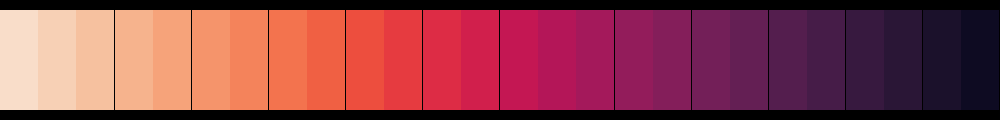

In [165]:
# Palette inspired from Seaborn palette for 26 colors
# https://seaborn.pydata.org/tutorial/color_palettes.html
# import seaborn as sns

# palette = list(reversed(sns.color_palette("rocket", 26).as_hex()))
# print(palette)

PALETTE_ROCKET_R_26 = [
    "#f9ddc9",
    "#f7d0b5",
    "#f6c19f",
    "#f6b38d",
    "#f6a37a",
    "#f5946b",
    "#f4835b",
    "#f3734e",
    "#f06043",
    "#ed4e3e",
    "#e63b40",
    "#dd2c45",
    "#d11f4c",
    "#c41753",
    "#b41658",
    "#a4195b",
    "#931c5b",
    "#841e5a",
    "#731f58",
    "#641f54",
    "#541e4e",
    "#461c48",
    "#37193f",
    "#2a1636",
    "#1b112b",
    "#0e0b22",
]

ANSYS_GOLD = "#FFB71B"
ANSYS_BRONZE = "#C89211"

from PIL import Image

width_px = 1000
new = Image.new(mode="RGB", size=(width_px, 120))

for i, color in enumerate(PALETTE_ROCKET_R_26):
    newt = Image.new(
        mode="RGB", size=(width_px // len(PALETTE_ROCKET_R_26), 100), color=color
    )
    new.paste(newt, (i * width_px // len(PALETTE_ROCKET_R_26), 10))

new


In [171]:
# Find the shortest path from start to end with only horizontal and vertical moves
# We need to have the next position with a letter that is at most 1 letter after the current letter
# We can first build a graph of all the letters and their possible neighbors
import matplotlib.pyplot as plt
import networkx as nx


def build_graph(data_grid: np.ndarray) -> nx.Graph:
    """Build graph of all the letters and their possible neighbors"""
    G = nx.DiGraph()

    def get_height(pos: Pos) -> str:
        MAPPING_HEIGHT = {"S": "a", "E": "z"}
        return MAPPING_HEIGHT.get(data_grid[pos], data_grid[pos])

    width, height = data_grid.shape

    for pos in np.ndindex(data_grid.shape):
        current_height = get_height(pos)
        if data_grid[pos] == "S":
            color = ANSYS_BRONZE
        elif data_grid[pos] == "E":
            color = ANSYS_GOLD
        else:
            color = PALETTE_ROCKET_R_26[ord(current_height) - ord("a")]
        G.add_node(pos, label=data_grid[pos], color=color)
        next_letter = chr(ord(current_height) + 1)
        for neighbor in get_neighbors(pos, width, height):
            neighbor_height = get_height(neighbor)
            if neighbor_height <= next_letter:
                G.add_edge(pos, neighbor)

    return G


def get_shortest_path_graph(
    data_grid: np.ndarray, start: Pos, end: Pos, show_graph: bool = False
) -> int:
    """Get shortest path from start to end with next letter at most 1 letter after current letter"""
    print(f"Start: {start}, end: {end}")
    G = build_graph(data_grid)
    solution = cast(int, nx.shortest_path_length(G, start, end))

    if show_graph:
        print(f"Found solution: {solution}")

        size = 10 if data_grid.shape[0] < 10 else 20
        plt.figure(figsize=(size, size))
        nx.draw(
            G,
            pos=nx.spring_layout(G),
            node_color=[G.nodes[n]["color"] for n in G.nodes],
            with_labels=size == 10,
        )

    return solution



Start: (0, 0), end: (2, 5)
Found solution: 31


31

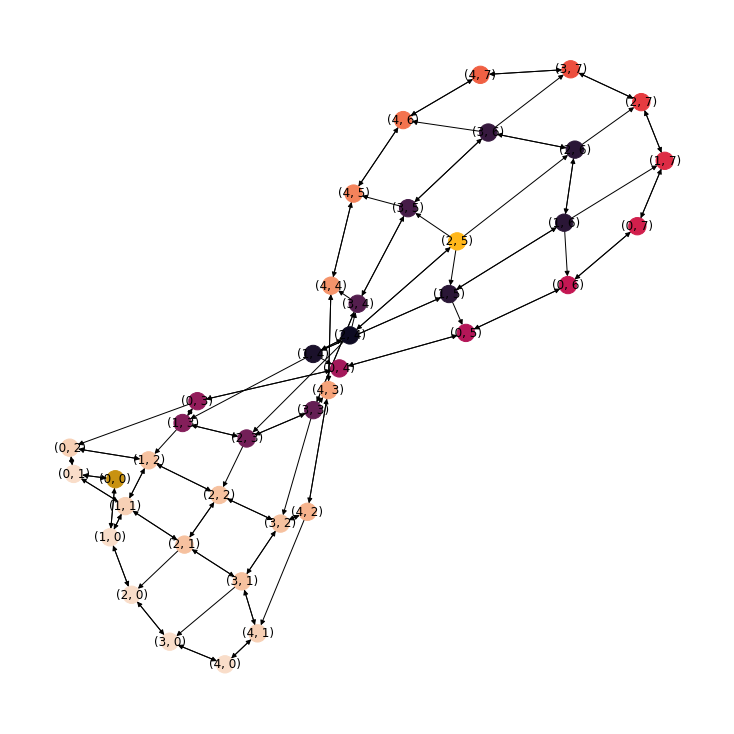

In [172]:
def get_shortest_path_from_str(data: str, show_graph: bool = False) -> int:
    data_grid = np.array([list(r) for r in data.strip().splitlines()])
    start = tuple(np.argwhere(data_grid == "S")[0])
    end = tuple(np.argwhere(data_grid == "E")[0])
    # return get_shortest_path(data_grid, start)
    return get_shortest_path_graph(data_grid, start, end, show_graph=show_graph)


get_shortest_path_from_str(MINI_DATA, show_graph=True)


Start: (20, 0), end: (20, 119)
Found solution: 423
Solution: 423


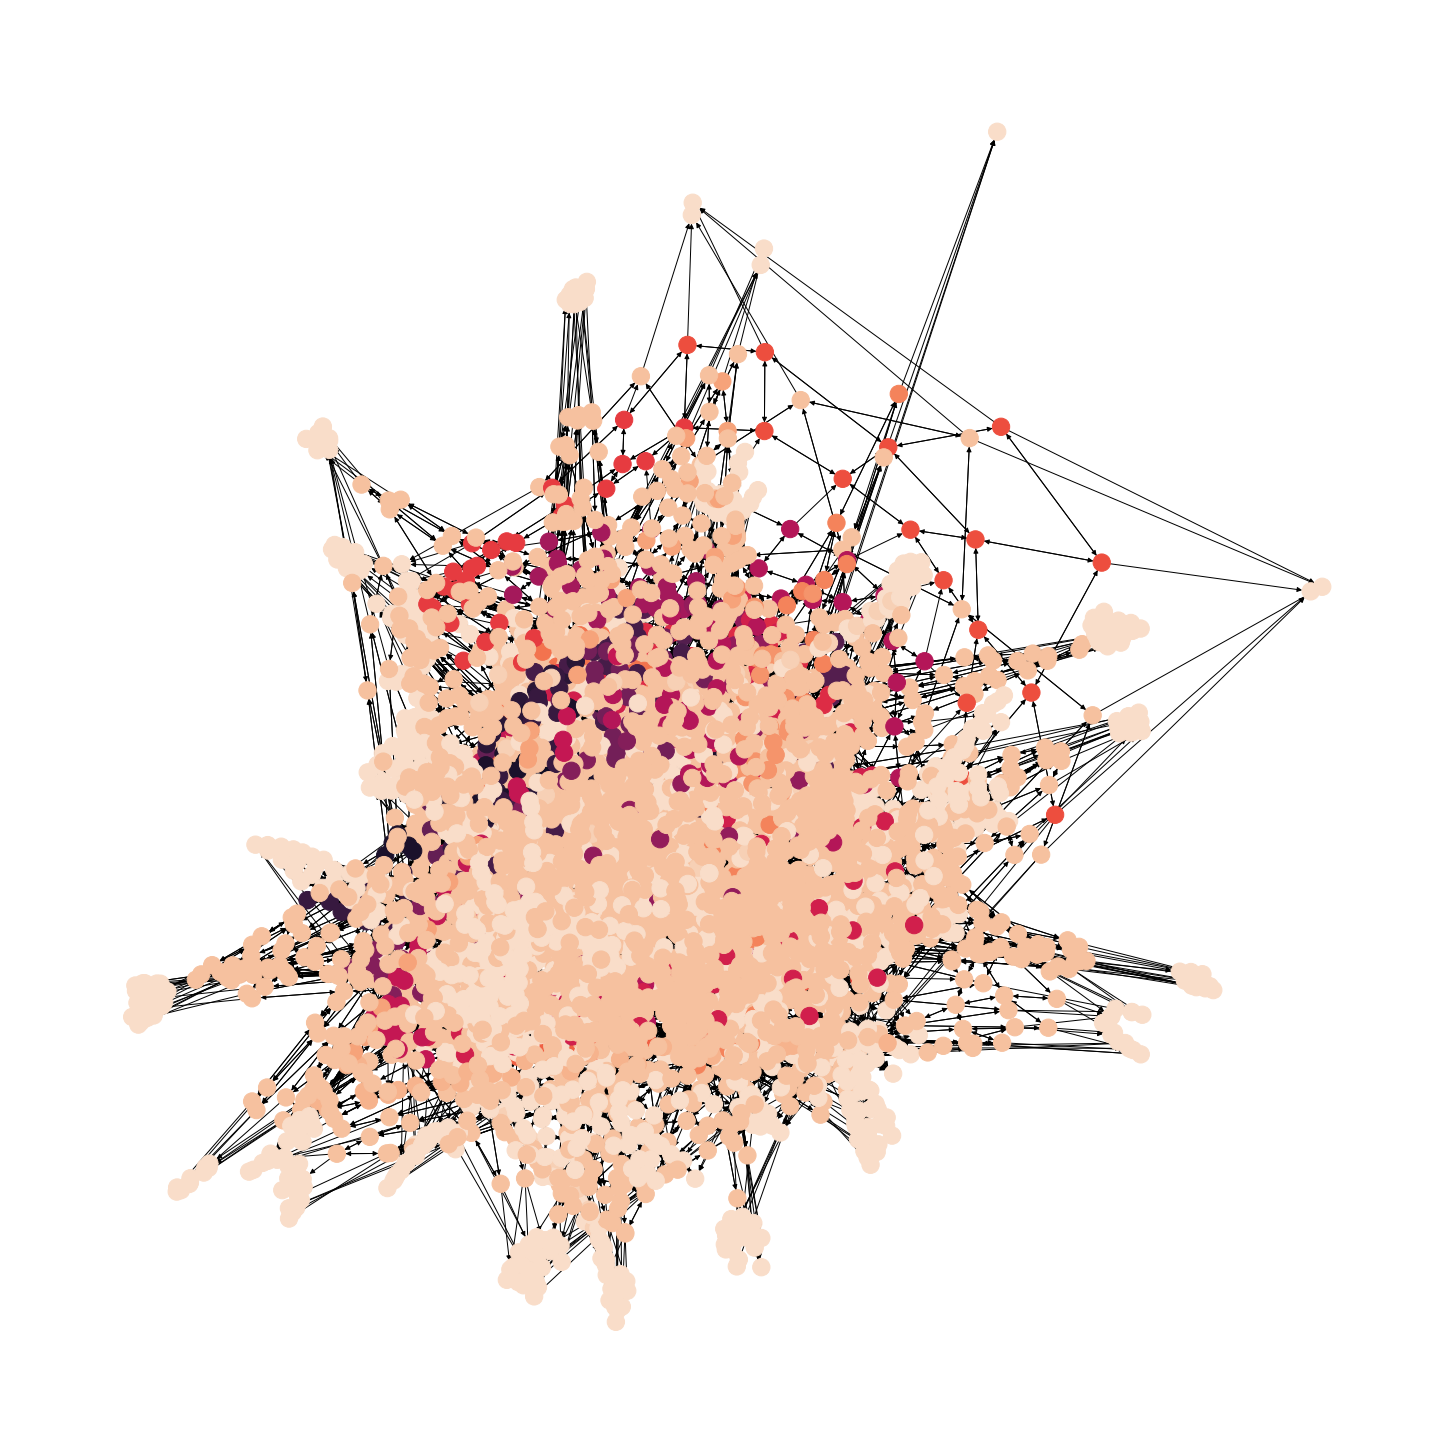

In [173]:
solution = get_shortest_path_from_str(data, show_graph=True)
print(f"Solution: {solution}")
# submit(solution, day=12, year=2022, part=1)


In [81]:
def get_shortest_path_from_a(data: str) -> int:
    data_grid = np.array([list(r) for r in data.strip().splitlines()])
    end = tuple(np.argwhere(data_grid == "E")[0])
    graph = build_graph(data_grid)
    # To limit the searches, we only look for starting point with "a" or "S" next to a "b"
    nodes_a = [
        n
        for n in graph.nodes
        if graph.nodes[n]["label"] in "Sa"
        and any(graph.nodes[s]["label"] == "b" for s in graph.successors(n))
    ]
    solutions: List[int] = []
    for start in nodes_a:
        try:
            solutions.append(cast(int, nx.shortest_path_length(graph, start, end)))
        except nx.NetworkXNoPath:
            pass
    solution = min(solutions)
    if solution < 26:
        raise ValueError(f"Solution is too low: {solution}")
    return solution


solution = get_shortest_path_from_a(MINI_DATA)
print(f"Solution: {solution}")


Solution: 29


In [82]:
solution = get_shortest_path_from_a(data)
print(f"Solution: {solution}")
submit(solution, day=12, year=2022, part=2)


Solution: 416
That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 12! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


<Response [200]>

In [83]:
data_grid = np.array([list(r) for r in data.strip().splitlines()])
graph = build_graph(data_grid)


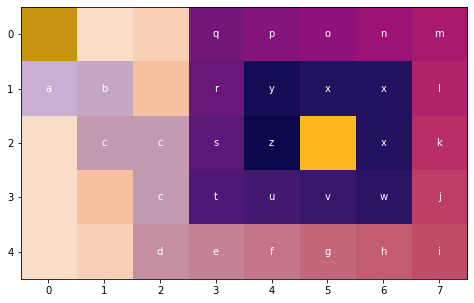

In [198]:
# Draw a map of height from data_grid by using the color of the letters
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def get_height_as_int(letter: str) -> int:
    if letter == "S":
        return 26
    if letter == "E":
        return 27
    return ord(letter) - ord("a")


PALETTE_PYPLOT = ListedColormap(PALETTE_ROCKET_R_26 + [ANSYS_BRONZE, ANSYS_GOLD])

def show_map(data: str, alpha_level: float = 0.2):
    """Show topographic map of the data height and the path from Start to End"""
    data_grid = np.array([list(r) for r in data.strip().splitlines()])
    data_heights = np.array([[get_height_as_int(c) for c in r] for r in data_grid])
    plt.figure(figsize=data_heights.shape[::-1])
    plt.imshow(data_heights, aspect="auto", cmap=PALETTE_PYPLOT)
    # Create a blue overlay for the positions in shortest path
    G = build_graph(data_grid)
    shortest_path = nx.shortest_path(G, tuple(np.argwhere(data_grid == "S")[0]), tuple(np.argwhere(data_grid == "E")[0]))
    overlay = np.zeros(data_heights.shape, dtype=int)
    for pos in shortest_path[1:-1]:
        overlay[pos] = 1
        plt.text(pos[1], pos[0], data_grid[pos], color="white", ha="center", va="center")
    plt.imshow(overlay, aspect="auto", cmap=ListedColormap(["#FFFFFF00", f"#0000FF{int(alpha_level * 255):02x}"]))



show_map(MINI_DATA)


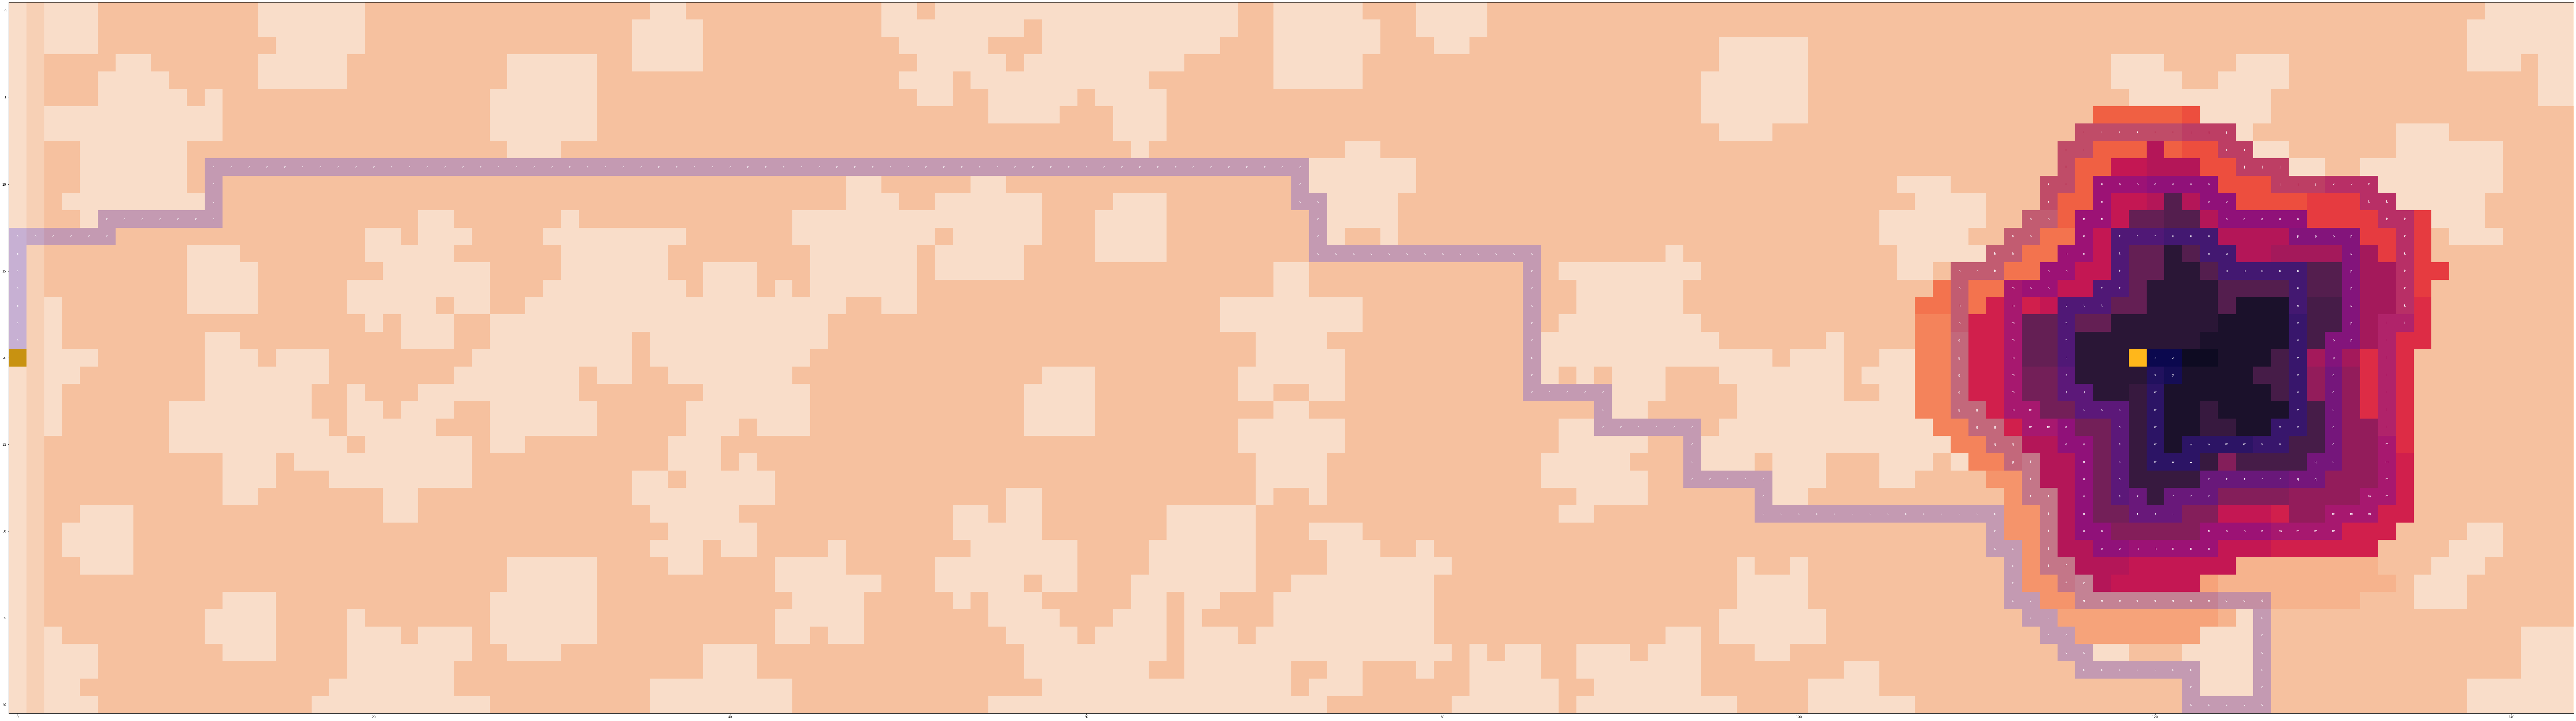

In [199]:
show_map(data)